#  numpy 와 Image 다루기 

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False  



In [2]:
from IPython.display import Image

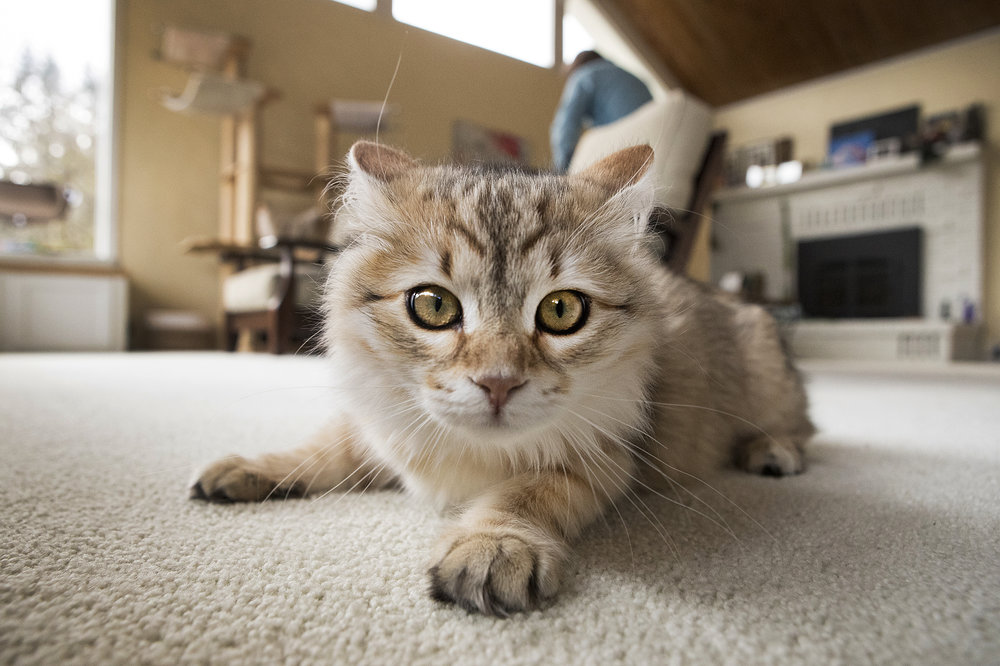

In [3]:
img_path = r'D:\DevRoot\DataSet\cat.jpg'
Image(img_path)

In [5]:
arr = plt.imread(img_path) # array 리턴
arr

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 38,  24,  11],
        [ 39,  25,  12],
        [ 39,  25,  12]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 40,  26,  13],
        [ 40,  26,  13],
        [ 40,  26,  13]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 40,  26,  13],
        [ 40,  26,  13],
        [ 39,  25,  12]],

       ...,

       [[122, 117,  97],
        [122, 117,  97],
        [120, 113,  94],
        ...,
        [131, 130, 125],
        [131, 130, 125],
        [131, 130, 125]],

       [[123, 116, 100],
        [123, 114,  97],
        [121, 113,  94],
        ...,
        [129, 128, 123],
        [125, 124, 119],
        [130, 129, 124]],

       [[125, 118, 102],
        [125, 116,  99],
        [123, 115,  96],
        ...,
        [130, 129, 124],
        [127, 126, 121],
        [132, 131, 126]]

In [7]:
# (height, width, pixel)
arr.shape

(666, 1000, 3)

In [8]:
arr.ndim

3

In [9]:
arr[0]   # 첫번째 row  (맨 위에서 첫번째)

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [ 38,  24,  11],
       [ 39,  25,  12],
       [ 39,  25,  12]], dtype=uint8)

In [10]:
arr[0][5]  # row : 0, col : 5 의 pixel rgb값

array([255, 255, 255], dtype=uint8)

In [11]:
arr[0, 5]

array([255, 255, 255], dtype=uint8)

In [12]:
arr[0, 5, 1]    # row : 0, col : 5 의 pixel의 green 값

255

### plt.imshow()

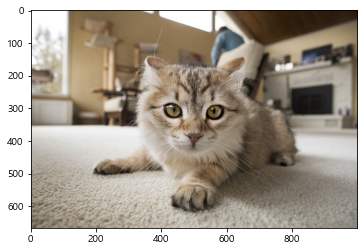

In [13]:
plt.imshow(arr)

In [14]:
arr.shape

(666, 1000, 3)

## 이미지 slicing
냥냥이 얼굴만 잘라내보자

In [15]:
arr[110:480]

array([[[217, 217, 217],
        [212, 212, 212],
        [209, 209, 209],
        ...,
        [137, 122,  89],
        [140, 124,  91],
        [141, 125,  92]],

       [[219, 217, 218],
        [214, 212, 213],
        [212, 210, 211],
        ...,
        [136, 121,  88],
        [138, 122,  89],
        [140, 124,  91]],

       [[218, 218, 218],
        [210, 210, 210],
        [207, 207, 207],
        ...,
        [140, 124,  91],
        [142, 126,  92],
        [144, 128,  94]],

       ...,

       [[166, 160, 144],
        [165, 159, 143],
        [165, 159, 143],
        ...,
        [179, 178, 173],
        [180, 179, 174],
        [181, 180, 175]],

       [[164, 158, 142],
        [164, 158, 142],
        [164, 158, 142],
        ...,
        [179, 178, 173],
        [179, 178, 173],
        [180, 179, 174]],

       [[165, 159, 143],
        [165, 159, 143],
        [166, 160, 144],
        ...,
        [179, 178, 173],
        [179, 178, 173],
        [180, 179, 174]]

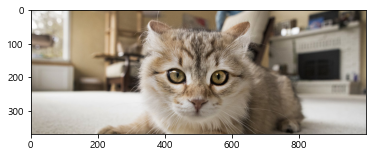

In [16]:
plt.imshow(arr[110:480])

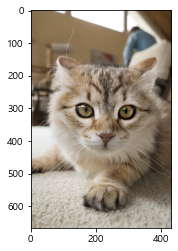

In [17]:
plt.imshow(arr[:, 270:700])

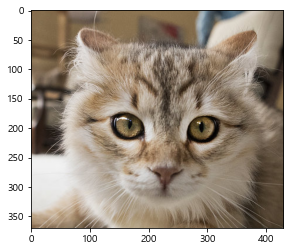

In [18]:
plt.imshow(arr[110:480, 270:700])

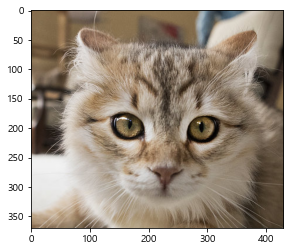

In [19]:
cat_face = arr[110:480, 270:700]
plt.imshow(cat_face)

### 좌우 반전, 상하반전

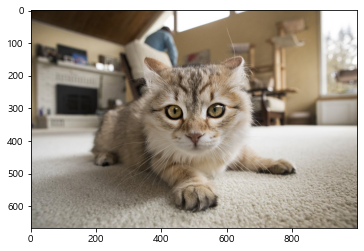

In [23]:
# 좌우반전
plt.imshow(arr[::, ::-1, ::])

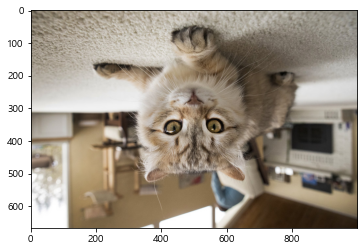

In [24]:
# 상하반전
plt.imshow(arr[::-1, ::, ::])

### 색상 gray scale 변경해보기

In [25]:
arr.shape

(666, 1000, 3)

In [26]:
# red 만 추출
r = arr[:, :, 0]
r

array([[255, 255, 255, ...,  38,  39,  39],
       [255, 255, 255, ...,  40,  40,  40],
       [255, 255, 255, ...,  40,  40,  39],
       ...,
       [122, 122, 120, ..., 131, 131, 131],
       [123, 123, 121, ..., 129, 125, 130],
       [125, 125, 123, ..., 130, 127, 132]], dtype=uint8)

In [27]:
r.shape

(666, 1000)

In [28]:
#     # image_arr.shape == (1200, 1600, 3)
#     r = image_arr[:, :, 0]    # r.shape = (1200, 1600)
#     g = image_arr[:, :, 1]
#     b = image_arr[:, :, 2]

# r, g, b  '3개의 색값'을 사용하여 '한개의 색' 로 변경하는 공식 예
#         r * 0.299 + g * 0.587 + b * 0.114   (green 값 강조)


# 즉
# (1200 x 1600 x 3) ...→ ... ( 1200 x 1600 ) 으로 변화시키면 된다.

# 이는 다음과 같은 행렬 곱을 하면 된다.
# (1200 x 1600 x 3) x ( 3 x 1 ) => 1200 x 1600



In [29]:
def color_to_grayscale(image_arr):
    return np.dot(
        image_arr,  # (h x w x rgb) 행렬
        np.array([  # (3 x 1) 행렬
            0.299, 
            0.587, 
            0.114
        ])  
    )

In [30]:
gray = color_to_grayscale(arr)
gray.shape

(666, 1000)

In [31]:
gray[0, 0]  # 0, 0 좌표 pixel 값! (픽셀값이 스칼라값이다!)

255.0

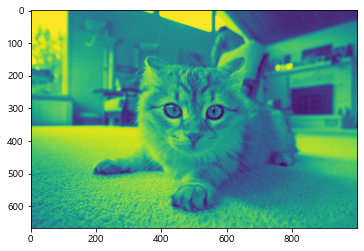

In [32]:
plt.imshow(gray) # pixel 값이 하나면 matplotlib 에선 기본적으로 초록색 톤으로 표현한다.

In [33]:
# lambda 로도 가능
to_gray = lambda image : np.dot(image, np.array([.299, .587, .114]))

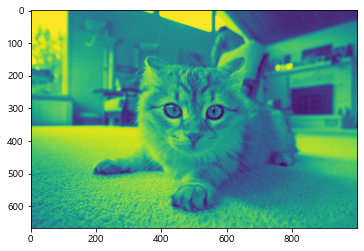

In [35]:
plt.imshow(to_gray(arr))

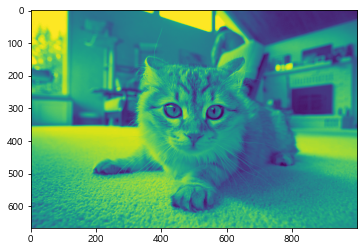

In [36]:
plt.imshow(np.dot(arr, np.array([1, 1, 1])))

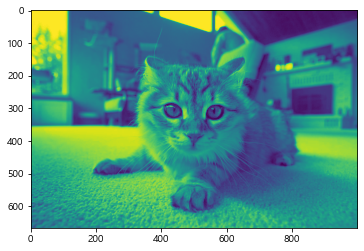

In [37]:
plt.imshow(np.dot(arr, np.array([0, 0, 1])))   # blue channel 만으로 gray 

### imshow() 의 cmap 옵션 적용

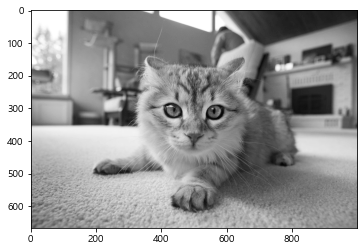

In [40]:
plt.imshow(gray, cmap=plt.get_cmap("gray"))  # 기본 초록색 톤이 아닌 다른 색으로 표현

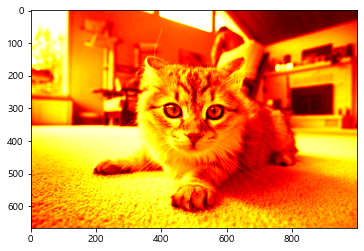

In [41]:
plt.imshow(gray, cmap=plt.get_cmap("hot"))

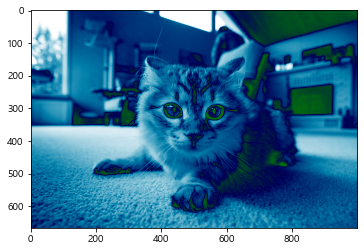

In [42]:
plt.imshow(gray, cmap=plt.get_cmap("ocean"))

In [43]:
# color map 참조
# https://matplotlib.org/users/colormaps.html
# https://matplotlib.org/examples/color/colormaps_reference.html

## image resize

In [45]:
from PIL import Image

In [47]:
img = Image.open(img_path)

In [48]:
img.thumbnail((64, 64), Image.ANTIALIAS)  # resize image 

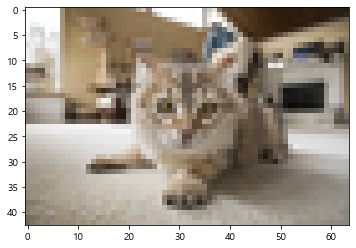

In [49]:
plt.imshow(img)

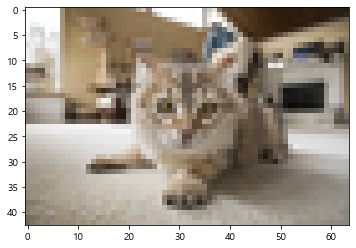

In [50]:
plt.imshow(img, interpolation="nearest")

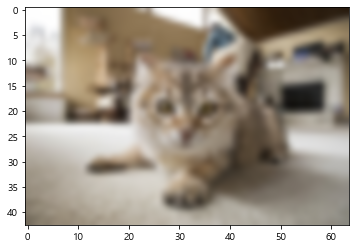

In [51]:
plt.imshow(img, interpolation="bicubic")